In [1]:
import pandas as pd
import numpy as np
import json,demjson
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
#show chinese words 
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
#显示所有列
pd.set_option('display.max_columns', None)

In [2]:
os.chdir(r'D:\dataset\clear_data')
#Read the chinese tweet CSV file again for check 
tweet_chinese_negative = pd.read_csv('tweet_chinese_negative.csv')
tweet_chinese_negative.head()

,tweet_id,text,word,user_location,tweet,sentiment,sentiment_v2
0,1283165896853381120,中国年最基底的真相是极度阴毒的商君书杀光光一切异己的大一统背叛出卖一切的诡计极度阴毒的法家儒...,中国 年 最 基底 的 真相 是 极度 阴毒 的 商君书 杀光 光 一切 异己 的 大一统 ...,NaN,@Fridaytalks @suguanghai31 中国\n2000年最基底的真相是---...,-9,-0.71
1,1283182735561916418,中国一直是不知道是最的民间传说神不知鬼不觉平乱所以被党看中了外网有黑的但实在找不到把柄,中国 一直 是 不 知道 是 最 的 民间传说 神不知鬼不觉 平乱 所以 被 党 看中 了 ...,NaN,@RacconTm 中国\n一直是：不知道是最🐂🍺的\n民间传说神不知鬼不觉平乱\n所以被党...,1,-0.43
2,1283187033981116416,内蒙牧民阻止汉人破坏草原被撞至重伤翻訳中国,内蒙 牧民 阻止 汉人 破坏 草原 被 撞 至 重伤 翻 訳 中国,NaN,内蒙牧民阻止汉人破坏草原被撞至重伤 https://t.co/tV8RNTEEDf 翻訳→ ...,-2,-1.00
3,1283192063366856706,台湾首次新宪公投听证会提案人指中华民国宪法贻害台湾七十年翻訳中国,台湾 首次 新宪公 投 听证会 提案人 指 中华民国 宪法 贻害 台湾 七十年 翻 訳 中国,NaN,台湾首次新宪公投听证会：提案人指中华民国宪法贻害台湾七十年 https://t.co/GLJ...,0,-1.00
4,1283193028547665920,台湾首次新宪公投听证会提案人指中华民国宪法贻害台湾七十年翻訳中国,台湾 首次 新宪公 投 听证会 提案人 指 中华民国 宪法 贻害 台湾 七十年 翻 訳 中国,NaN,RT @RadioFreeAsiajp: 台湾首次新宪公投听证会：提案人指中华民国宪法贻害台...,0,-1.00


# 先筛选属于消极情感的推文

In [3]:
chinese_offensive = tweet_chinese_negative[tweet_chinese_negative.sentiment < 0]

In [4]:
chinese_offensive.head()

,tweet_id,text,word,user_location,tweet,sentiment,sentiment_v2
0,1283165896853381120,中国年最基底的真相是极度阴毒的商君书杀光光一切异己的大一统背叛出卖一切的诡计极度阴毒的法家儒...,中国 年 最 基底 的 真相 是 极度 阴毒 的 商君书 杀光 光 一切 异己 的 大一统 ...,NaN,@Fridaytalks @suguanghai31 中国\n2000年最基底的真相是---...,-9,-0.71
2,1283187033981116416,内蒙牧民阻止汉人破坏草原被撞至重伤翻訳中国,内蒙 牧民 阻止 汉人 破坏 草原 被 撞 至 重伤 翻 訳 中国,NaN,内蒙牧民阻止汉人破坏草原被撞至重伤 https://t.co/tV8RNTEEDf 翻訳→ ...,-2,-1.00
5,1283194553172803584,捐一定捐条鸠毛中国有出现过天灾咩冇啵冇水灾冇旱灾冇地震冇蝗灾冇粮荒冇瘟疫国泰民安歌舞升平亿人...,捐 一定 捐條 鳩 毛 中国 有出 現過 天災 咩 冇 啵 冇 水災 冇 旱災 冇 地震 冇...,"Los Angeles, CA",@Leung18188868 @mvhb8964lprkqv @jaylchaoKitty ...,-2,-0.60
6,1283197092840660992,微信在海外摊上事了华人欲集体起诉腾讯向微信索赔禁闻网中国中国共产党共产党华人微信海外美国肺炎腾讯,微信 在 海外 摊上 事 了 华人 欲 集体 起诉 腾讯 向 微信 索赔 禁闻网 中国 中国...,USA,微信在海外摊上事了！ 华人欲集体起诉腾讯 向微信索赔！ - 禁闻网 https://t.co...,-1,-1.00
7,1283199865598603264,王友群阎丽梦博士逃亡美国五大冲击波图阎丽梦川普中国,王友群 阎丽梦 博士 逃亡 美国 五大 冲击波 图 阎丽梦川普 中国,USA,王友群：阎丽梦博士逃亡美国五大冲击波(图):… https://t.co/BGKxxdBWE...,-2,-1.00


In [5]:
chinese_offensive.sentiment.value_counts()

-1     25899
-2     13404
-3     11897
-4      6538
-5      5512
-6      2477
-7      1399
-9      1186
-8       474
-10      371
-11      145
-12       36
-13       18
-15        2
-16        1
Name: sentiment, dtype: int64

In [6]:
sample = chinese_offensive[chinese_offensive.sentiment < -8]

In [7]:
sample.head()

,tweet_id,text,word,user_location,tweet,sentiment,sentiment_v2
0,1283165896853381120,中国年最基底的真相是极度阴毒的商君书杀光光一切异己的大一统背叛出卖一切的诡计极度阴毒的法家儒...,中国 年 最 基底 的 真相 是 极度 阴毒 的 商君书 杀光 光 一切 异己 的 大一统 ...,NaN,@Fridaytalks @suguanghai31 中国\n2000年最基底的真相是---...,-9,-0.71
491,1283356822020083713,展前景如何呢假如说特朗普失败了左派继续主导美国的进程那就是继续慢性自杀的进程美国文明的慢性自...,展 前景 如何 呢 假如 说 特朗普 失败 了 左派 继续 主导 美国 的 进程 那 就是 ...,淪陷區,RT @LPX2019: 展前景如何呢？假如说特朗普失败了，左派继续主导美国的进程，那就是继...,-9,-0.38
827,1283312841097916418,纽约州长特朗普的无耻已经到了极致特朗普的新冠肺炎丑闻已经超越了水门事件水门事件至少没有死人特...,纽约州 长 特朗普 的 无耻 已经 到 了 极致 特朗普 的 新冠 肺炎 丑闻 已经 超越 ...,false,RT @ndjixg2014: 纽约州长：特朗普的无耻已经到了极致。特朗普的“新冠肺炎丑闻”...,-9,-0.31
1113,1283285878274527237,特朗普的愤怒他愤怒美国确诊病例和死亡病例全球第一特朗普愤怒世界人口第一大国的病例和死亡病例没...,特朗普 的 愤怒 他 愤怒 美国 确诊 病例 和 死亡 病例 全球 第一 特朗普 愤怒 世界...,false,RT @woody48315915: @VOAChinese 特朗普的愤怒！他愤怒美国确诊病...,-11,-0.71
1200,1283275757821865984,纽约州长特朗普的无耻已经到了极致特朗普的新冠肺炎丑闻已经超越了水门事件水门事件至少没有死人特...,纽约州 长 特朗普 的 无耻 已经 到 了 极致 特朗普 的 新冠 肺炎 丑闻 已经 超越 ...,美国,RT @ndjixg2014: 纽约州长：特朗普的无耻已经到了极致。特朗普的“新冠肺炎丑闻”...,-9,-0.31


In [8]:
for i in sample.tweet:
    print(i)
    print('---------------')

@Fridaytalks @suguanghai31 中国
2000年最基底的真相是----
极度阴毒的 商君书
杀光光一切异己的 大一统
背叛出卖一切的 36诡计
极度阴毒的 法家儒家
极度歹毒的 罗织经

至于那些所谓的美德 是要求奴隶安心做奴不反抗的ISO标准要求
---------------
RT @LPX2019: 展前景如何呢？假如说特朗普失败了，左派继续主导美国的进程，那就是继续慢性自杀的进程，美国文明的慢性自杀。当然，这个慢性自杀是个漫长的过程，不要以为美国马上就完蛋了。百足之虫还死而不僵呢，何况一个伟大的文明？既然是慢性自杀，就是温水煮青蛙的方式。在这个过…
---------------
RT @ndjixg2014: 纽约州长：特朗普的无耻已经到了极致。特朗普的“新冠肺炎丑闻”，已经超越了水门事件。水门事件至少没有死人。特朗普的丑闻让水门事件都显得无辜。
评：全美320万人感染！13万人死亡！这骗子竟然还声称要给自己的总统任期打满分。
特朗普的反社会人格及其簇…
---------------
RT @woody48315915: @VOAChinese 特朗普的愤怒！他愤怒美国确诊病例和死亡病例全球第一！特朗普愤怒世界人口第一大国的病例和死亡病例没有超过美国，不能成为美国病毒控制失败和蔓延的遮羞布，让特朗普没有参照对象！永远指责别人！
---------------
RT @ndjixg2014: 纽约州长：特朗普的无耻已经到了极致。特朗普的“新冠肺炎丑闻”，已经超越了水门事件。水门事件至少没有死人。特朗普的丑闻让水门事件都显得无辜。
评：全美320万人感染！13万人死亡！这骗子竟然还声称要给自己的总统任期打满分。
特朗普的反社会人格及其簇…
---------------
纽约州长：特朗普的无耻已经到了极致。特朗普的“新冠肺炎丑闻”，已经超越了水门事件。水门事件至少没有死人。特朗普的丑闻让水门事件都显得无辜。
评：全美320万人感染！13万人死亡！这骗子竟然还声称要给自己的总统任期打满分。
特朗普的… https://t.co/hjux0FGDWF
---------------
RT @come03563392: 只是世事无绝对，突如其来的新冠疫情和弗洛伊德之死事件，加剧放大了联邦政府的低效、无能，以及特朗普狂傲自大、揽功推责等缺点，彻

他说：这是一个信任的问题…
---------------
RT @RFA_Chinese: 【英外相驳斥刘晓明“干涉中国内政”论】

中国驻英大使刘晓明谴责英国让BNO(英国国民海外)护照持有人入籍，严重干涉中国内政

英外相蓝韬文周一驳斥指控，批评北京实施港区国安法，破坏中英联合声明承诺，却反过来指控英方

他说：这是一个信任的问题…
---------------
RT @RFA_Chinese: 【英外相驳斥刘晓明“干涉中国内政”论】

中国驻英大使刘晓明谴责英国让BNO(英国国民海外)护照持有人入籍，严重干涉中国内政

英外相蓝韬文周一驳斥指控，批评北京实施港区国安法，破坏中英联合声明承诺，却反过来指控英方

他说：这是一个信任的问题…
---------------
RT @RFA_Chinese: 【英外相驳斥刘晓明“干涉中国内政”论】

中国驻英大使刘晓明谴责英国让BNO(英国国民海外)护照持有人入籍，严重干涉中国内政

英外相蓝韬文周一驳斥指控，批评北京实施港区国安法，破坏中英联合声明承诺，却反过来指控英方

他说：这是一个信任的问题…
---------------
RT @RFA_Chinese: 【英外相驳斥刘晓明“干涉中国内政”论】

中国驻英大使刘晓明谴责英国让BNO(英国国民海外)护照持有人入籍，严重干涉中国内政

英外相蓝韬文周一驳斥指控，批评北京实施港区国安法，破坏中英联合声明承诺，却反过来指控英方

他说：这是一个信任的问题…
---------------
RT @RFA_Chinese: 【英外相驳斥刘晓明“干涉中国内政”论】

中国驻英大使刘晓明谴责英国让BNO(英国国民海外)护照持有人入籍，严重干涉中国内政

英外相蓝韬文周一驳斥指控，批评北京实施港区国安法，破坏中英联合声明承诺，却反过来指控英方

他说：这是一个信任的问题…
---------------
RT @RFA_Chinese: 【英外相驳斥刘晓明“干涉中国内政”论】

中国驻英大使刘晓明谴责英国让BNO(英国国民海外)护照持有人入籍，严重干涉中国内政

英外相蓝韬文周一驳斥指控，批评北京实施港区国安法，破坏中英联合声明承诺，却反过来指控英方

他说：这是一个信任的问题…
---------------
RT @RFA_Chinese: 【英外相驳斥刘晓明“干

---------------
RT @baojianella: @RFA_Chinese 没有当初谭德塞对中共疫情处置的高度赞美、没有谭德塞挟持的WHO一再推迟将这个诡异病毒🦠定性为全球国际关注的突发公共卫生事件（PHEIC），即WHO传染病最高等级、没有谭德塞一再反对对中国采取旅行或贸易禁令……哪儿来的武…
---------------
RT @baojianella: @RFA_Chinese 没有当初谭德塞对中共疫情处置的高度赞美、没有谭德塞挟持的WHO一再推迟将这个诡异病毒🦠定性为全球国际关注的突发公共卫生事件（PHEIC），即WHO传染病最高等级、没有谭德塞一再反对对中国采取旅行或贸易禁令……哪儿来的武…
---------------
RT @baojianella: @RFA_Chinese 没有当初谭德塞对中共疫情处置的高度赞美、没有谭德塞挟持的WHO一再推迟将这个诡异病毒🦠定性为全球国际关注的突发公共卫生事件（PHEIC），即WHO传染病最高等级、没有谭德塞一再反对对中国采取旅行或贸易禁令……哪儿来的武…
---------------
RT @baojianella: @RFA_Chinese 没有当初谭德塞对中共疫情处置的高度赞美、没有谭德塞挟持的WHO一再推迟将这个诡异病毒🦠定性为全球国际关注的突发公共卫生事件（PHEIC），即WHO传染病最高等级、没有谭德塞一再反对对中国采取旅行或贸易禁令……哪儿来的武…
---------------
RT @baojianella: @RFA_Chinese 没有当初谭德塞对中共疫情处置的高度赞美、没有谭德塞挟持的WHO一再推迟将这个诡异病毒🦠定性为全球国际关注的突发公共卫生事件（PHEIC），即WHO传染病最高等级、没有谭德塞一再反对对中国采取旅行或贸易禁令……哪儿来的武…
---------------
没有当初谭德塞对中共疫情处置的高度赞美、没有谭德塞挟持的WHO一再推迟将这个诡异病毒🦠定性为全球国际关注的突发公共卫生事件（PHEIC），即WHO传染病最高等级、没有谭德塞一再反对对中国采取旅行或贸易禁令……哪儿来的武汉病毒全球大… https://t.co/Q5l71Gt0bZ
---------------
RT @T4fXxCHo29p7tQ9: 现如今，新冠肺炎疫情在全球急速蔓延，中国境

BLM打白人不是仇恨罪，BLM推倒雕像不是仇恨罪，谁规定不想看到BLM…
---------------
RT @AngelaG03421476: 加州：这对夫妻在7月4日把街道上的BLM字样涂黑，并说种族歧视是左派的谎言

目前两个人因为仇恨罪将要被地方政府起诉，如果罪名成立将会入狱1年。先生已经被公司开除

BLM打白人不是仇恨罪，BLM推倒雕像不是仇恨罪，谁规定不想看到BLM…
---------------
RT @AngelaG03421476: 加州：这对夫妻在7月4日把街道上的BLM字样涂黑，并说种族歧视是左派的谎言

目前两个人因为仇恨罪将要被地方政府起诉，如果罪名成立将会入狱1年。先生已经被公司开除

BLM打白人不是仇恨罪，BLM推倒雕像不是仇恨罪，谁规定不想看到BLM…
---------------
RT @AngelaG03421476: 加州：这对夫妻在7月4日把街道上的BLM字样涂黑，并说种族歧视是左派的谎言

目前两个人因为仇恨罪将要被地方政府起诉，如果罪名成立将会入狱1年。先生已经被公司开除

BLM打白人不是仇恨罪，BLM推倒雕像不是仇恨罪，谁规定不想看到BLM…
---------------
RT @AngelaG03421476: 加州：这对夫妻在7月4日把街道上的BLM字样涂黑，并说种族歧视是左派的谎言

目前两个人因为仇恨罪将要被地方政府起诉，如果罪名成立将会入狱1年。先生已经被公司开除

BLM打白人不是仇恨罪，BLM推倒雕像不是仇恨罪，谁规定不想看到BLM…
---------------
RT @AngelaG03421476: 加州：这对夫妻在7月4日把街道上的BLM字样涂黑，并说种族歧视是左派的谎言

目前两个人因为仇恨罪将要被地方政府起诉，如果罪名成立将会入狱1年。先生已经被公司开除

BLM打白人不是仇恨罪，BLM推倒雕像不是仇恨罪，谁规定不想看到BLM…
---------------
RT @AngelaG03421476: 加州：这对夫妻在7月4日把街道上的BLM字样涂黑，并说种族歧视是左派的谎言

目前两个人因为仇恨罪将要被地方政府起诉，如果罪名成立将会入狱1年。先生已经被公司开除

BLM打白人不是仇恨罪，BLM推倒雕像不是仇恨罪，谁规定不想看到BLM…
---------------
RT @A

In [9]:
# 中共远比当年的纳粹狡诈残忍邪恶以前习近平说过共产党只祸害中国人又没祸害外国人但现在可不仅仅是祸害中国人了
# 它们把病毒传播到了全世界还隐蔽的输出他们那邪恶的价值观妄图摧毁文明秩序代之以兽性混乱所以热战是一定的

# English translate:
#   The CCP is far more cunning, cruel and evil than the Nazis back then. 
# Xi Jinping said that trade unions only harm Chinese people and not foreigners, but now they can avoid harming Chinese people. 
# They spread the virus to the world and secretly export their evil variables in an attempt to destroy civilization. 
# The level is replaced by animal chaos, so hot wars are certain

In [10]:
# 在中共等独裁专制下因为习近平要领导司法司法不能独立所以无法从制度上彻底铲除腐败反腐败最多只是大老虎打小老虎谁也不敢反将整个国家窃为己
# 所有的中共最高层腐败只有向台湾学习建立民主制度确保司法独立让老百姓敢揭露腐败能将腐败的习近平拉下马铲除腐败才有希望


# English translate:
# Under the dictatorship of the CCP and other dictatorships, Xi Jinping cannot completely eradicate corruption from the system 
# because Xi Jinping wants to lead the judiciary and the judiciary cannot be independent. 
# Taiwan learns to establish a democratic system to ensure the independence of the judiciary. Let the people dare to expose corruption. 
# Only if the corrupt Xi Jinping can be dismantled and eradicated, there is hope

In [11]:
# 特朗普的无耻已经到了极致特朗普的新冠肺炎丑闻已经超越了水门事件水门事件至少没有死人特朗普的丑闻让水门事件都显得无辜
# 全美万人感染万人死亡这骗子竟然还声称要给自己的总统任期打满分特朗普的反社会人格


# English translate:
# The previous shamelessness has reached the limit. The overlapping new crown pneumonia scandal has surpassed the Watergate incident.
# At least the scandal without the resettlement of the dead has left the Watergate incident innocent.
# Ten thousand people in the United States infected with ten thousand deaths. 
# This liar must have anti-social personality to sort his presidential term

In [1]:
# 如果罗斯福是中国人，原子弹一定投东京和京都，如果冯·肖尔蒂茨是中国人，诺曼底登陆后的巴黎一定会被炸平，
# 如果小布什是中国人，萨达母全家一定会被灭门，如果特朗普是中国人，一定会把全美的非裔赶出美国。
# 中国人统治世界会是什么样，请以上述假设做参考。

# English translate:
# If Roosevelt is a Chinese, the atomic bombs must be dropped on Tokyo and Kyoto, 
# if von Scholtitz is a Chinese, Paris after Normandy’s landing will definitely be bombed.
# If Bush Jr. is Chinese, Saddam’s family will definitely be wiped out. 
# If Trump is Chinese, all African Americans will be driven out of the United States.
# What will the Chinese rule the world like? Please use the above assumptions for reference.

# According to some of  tweets  above, they can be found that there are a lot of anti-China comments  or anti-US in negative Chinese tweets, including rumors and slanders directed at the Chinese government or Chinese leaders.

# 针对不同国家的推文

In [109]:
chinese_offensive_list = []

In [110]:
target = ['美国']
pattern = '|'.join(target)
chinese_offensive_us = chinese_offensive[chinese_offensive['text'].str.contains(pattern, case=False)]
chinese_offensive_list.append(len(chinese_offensive_us))
chinese_offensive_us.head()

,tweet_id,text,word,user_location,tweet,sentiment,sentiment_v2
6,1283197092840660992,微信在海外摊上事了华人欲集体起诉腾讯向微信索赔禁闻网中国中国共产党共产党华人微信海外美国肺炎腾讯,微信 在 海外 摊上 事 了 华人 欲 集体 起诉 腾讯 向 微信 索赔 禁闻网 中国 中国...,USA,微信在海外摊上事了！ 华人欲集体起诉腾讯 向微信索赔！ - 禁闻网 https://t.co...,-1,-1.0
7,1283199865598603264,王友群阎丽梦博士逃亡美国五大冲击波图阎丽梦川普中国,王友群 阎丽梦 博士 逃亡 美国 五大 冲击波 图 阎丽梦川普 中国,USA,王友群：阎丽梦博士逃亡美国五大冲击波(图):… https://t.co/BGKxxdBWE...,-2,-1.0
9,1283204519057330176,微信在海外摊上事了华人欲集体起诉腾讯向微信索赔禁闻网中国中国共产党共产党华人微信海外美国肺炎腾讯,微信 在 海外 摊上 事 了 华人 欲 集体 起诉 腾讯 向 微信 索赔 禁闻网 中国 中国...,NaN,RT @bannedebook: 微信在海外摊上事了！ 华人欲集体起诉腾讯 向微信索赔！ -...,-1,-1.0
10,1283205173314121728,微信在海外摊上事了华人欲集体起诉腾讯向微信索赔禁闻网中国中国共产党共产党华人微信海外美国肺炎腾讯,微信 在 海外 摊上 事 了 华人 欲 集体 起诉 腾讯 向 微信 索赔 禁闻网 中国 中国...,NaN,RT @bannedebook: 微信在海外摊上事了！ 华人欲集体起诉腾讯 向微信索赔！ -...,-1,-1.0
16,1283214570731876354,王友群阎丽梦博士逃亡美国五大冲击波图阎丽梦川普中国,王友群 阎丽梦 博士 逃亡 美国 五大 冲击波 图 阎丽梦川普 中国,NaN,RT @aboluowang: 王友群：阎丽梦博士逃亡美国五大冲击波(图):… https:...,-2,-1.0


In [111]:
target = ['欧盟','欧洲']
pattern = '|'.join(target)
chinese_offensive_europe = chinese_offensive[chinese_offensive['text'].str.contains(pattern, case=False)]
chinese_offensive_list.append(len(chinese_offensive_europe))
chinese_offensive_europe.head()

,tweet_id,text,word,user_location,tweet,sentiment,sentiment_v2
136,1283386511283478528,若美国封锁海路共产党可转向俄罗斯购买石油能狮子开大口又卖人情正中下怀今年跟二战前的形势有相似...,若美國 封鎖 海路 共产党 可轉 向 俄羅斯購 買 石油 能 獅子 開大口 又 賣 人情 正...,"Los Angeles, CA",@AndrewC86186 若美國封鎖海路， #共产党 可轉向俄羅斯購買石油，能獅子開大口又...,-3,-0.60
2018,1283213667295612928,加速那还得看总加速是特朗普手撕拳打欧盟日本我们特朗普真是太厉害啦,加速 那 还 得 看 总 加速 是 特朗普 手 撕 拳打 欧盟 日本 我们 特朗普 真是太 ...,ShangHai A.K.A Little Mumbai,@l4aEtbX5FIdzdEj @VOAChinese 加速那还得看总加速是特朗普，手撕T...,-1,-1.00
2901,1283156692469870592,美国欧洲的白人狂妄的反智程度已经达到了一个前所未有的新高度它们认为它们甚至可以挑战它们自己强...,美国 欧洲 的 白人 狂妄 的 反智 程度 已经 达到 了 一个 前所未有 的 新 高度 它...,"Scarborough, GTA, Ontario, Canada",美国欧洲的白人狂妄的反智程度已经达到了一个前所未有的新高度，它们认为它们甚至可以挑战它们自己...,-4,-0.17
3113,1283063807686987783,北京不顾香港民意及国际反弹声浪强行实施香港国安法使得欧盟改变了原先对美国总统特朗普严厉制裁中...,北京 不顾 香港 民意 及 国际 反弹 声浪 强行 实施 香港 国安法 使得 欧盟 改变 了...,false,RT @sinbad_W: 北京不顾香港民意及国际反弹声浪强行实施香港国安法，使得欧盟改变了...,-3,0.20
3116,1283063241149517824,北京不顾香港民意及国际反弹声浪强行实施香港国安法使得欧盟改变了原先对美国总统特朗普严厉制裁中...,北京 不顾 香港 民意 及 国际 反弹 声浪 强行 实施 香港 国安法 使得 欧盟 改变 了...,World,北京不顾香港民意及国际反弹声浪强行实施香港国安法，使得欧盟改变了原先对美国总统特朗普严厉制裁...,-3,0.20


In [112]:
target = ['俄罗斯']
pattern = '|'.join(target)
chinese_offensive_russia = chinese_offensive[chinese_offensive['text'].str.contains(pattern, case=False)]
chinese_offensive_list.append(len(chinese_offensive_russia))
chinese_offensive_russia.head()

,tweet_id,text,word,user_location,tweet,sentiment,sentiment_v2
79,1283327200784076801,鼠疫攻破蒙古国沙俄边境惊惶检测带你看俄中近年的病毒战争禁闻网中国俄罗斯头痛战争病毒肺炎蒙古蒙...,鼠疫 攻破 蒙古国 沙俄 边境 惊惶 检测 带 你 看 俄 中 近年 的 病毒 战争 禁闻网...,USA,鼠疫攻破蒙古国 沙俄边境惊惶检测 带你看俄中近年的病毒战争 - 禁闻网 https://t....,-4,-0.72
80,1283328941676093440,鼠疫攻破蒙古国沙俄边境惊惶检测带你看俄中近年的病毒战争禁闻网中国俄罗斯头痛战争病毒肺炎蒙古蒙...,鼠疫 攻破 蒙古国 沙俄 边境 惊惶 检测 带 你 看 俄 中 近年 的 病毒 战争 禁闻网...,Earth,RT @bannedebook: 鼠疫攻破蒙古国 沙俄边境惊惶检测 带你看俄中近年的病毒战争...,-4,-0.72
136,1283386511283478528,若美国封锁海路共产党可转向俄罗斯购买石油能狮子开大口又卖人情正中下怀今年跟二战前的形势有相似...,若美國 封鎖 海路 共产党 可轉 向 俄羅斯購 買 石油 能 獅子 開大口 又 賣 人情 正...,"Los Angeles, CA",@AndrewC86186 若美國封鎖海路， #共产党 可轉向俄羅斯購買石油，能獅子開大口又...,-3,-0.60
1983,1283216431060938752,你们如愿把自己活成了样特朗普是你们自己的选择哦哦哦不对中国和俄罗斯干扰了大选,你们 如愿 把 自己 活成 了 样 特朗普 是 你们 自己 的 选择 哦哦哦 不 对 中国 ...,false,@nytchinese @michelleinbklyn 你们如愿把自己活成了“sb样”，特...,-1,-0.33
3309,1282995270414991360,特朗普可是你们美国人一人一票选出来和中国毫无关系其实和俄罗斯也没有什么关系啥通俄门只是个政治...,特朗普 可是 你们 美国 人一人 一 票选 出来 和 中国 毫无关系 其实 和 俄罗斯 也 ...,"Toronto, Ontario",RT @CX0J5dftYExob2E: @nytchinese @michelleinbk...,-1,0.00


In [113]:
target = ['非洲']
pattern = '|'.join(target)
chinese_offensive_africa = chinese_offensive[chinese_offensive['text'].str.contains(pattern, case=False)]
chinese_offensive_list.append(len(chinese_offensive_africa))
chinese_offensive_africa.head()

,tweet_id,text,word,user_location,tweet,sentiment,sentiment_v2
2985,1283138351554367489,特朗普的问题在于不仅病毒被政治化了它的影响也被种族化了黑色和棕色人种将承受最糟糕的结果现在一...,特朗普 的 问题 在于 不仅 病毒 被 政治化 了 它 的 影响 也 被 种族 化 了 黑色...,false,特朗普的问题在于，不仅病毒被政治化了，它的影响也被种族化了：黑色和棕色人种将承受最糟糕的结果...,-6,-0.61
4251,1282684986915614720,黑人兄弟他们所要对抗的是他们的政府特朗普执政期间多次废除了前总统奥巴马所签署的协议他才是一个...,黑人 兄弟 他们 所 要 对抗 的 是 他们 的 政府 特朗普 执政 期间 多次 废除 了 ...,false,@bbcchinese 黑人兄弟他们所要对抗的是他们的政府，特朗普执政期间，多次废除了前总统...,-3,-1.00
10304,1280563967409053696,你是亚裔美国人特朗普试图保护所有人的安全不受侵犯而你还攻击他你看看黑鬼对中国人的伤害在美国和非洲,你 是 亚裔 美国 人 特朗普 试图 保护 所有人 的 安全 不 受 侵犯 而 你 还 攻击...,郑州,@eugenegu @realDonaldTrump @WashTimes 你是亚裔美国人？...,-1,-0.49
11555,1283323291013312513,你不觉得在外交政策引导下民间戾气越来越重了么从日本印度韩国越南美国新加坡加拿大澳大利亚到欧洲...,你 不 觉得 在 外交政策 引导 下 民间 戾 气 越来越重 了 么 从 日本 印度 韩国 ...,false,@DUYAformhell 你不觉得，在外交政策引导下，民间戾气越来越重了么？从日本印度韩国...,-5,-0.71
11566,1283316502670856192,你必须在一个国家架设服务器不然就墙你是一个彻头彻尾的流氓行为竟然还能被你说得这么冠冕堂皇你微...,你 必须 在 一个 国家 架设 服务器 不然 就 墙 你 是 一个 彻头彻尾 的 流氓行为 ...,false,@guxiaojun2020 @jiongnasen 你必须在一个国家架设服务器，不然就墙你...,-2,-1.00


In [114]:
target = ['新冠','新冠病毒','COVID-19']
pattern = '|'.join(target)
chinese_offensive_covid = chinese_offensive[chinese_offensive['text'].str.contains(pattern, case=False)]
chinese_offensive_list.append(len(chinese_offensive_covid))
chinese_offensive_covid.head()

,tweet_id,text,word,user_location,tweet,sentiment,sentiment_v2
17,1283220354677104640,日中国境内新冠肺炎疫情更新无新增死亡病例新增例确诊病例全部为境外输入新增例无症状感染者名患者...,日 中国 境内 新冠 肺炎 疫情 更新 无 新增 死亡 病例 新增 例 确诊 病例 全部 为...,Hong Kong,"🇨🇳 14日, #中国 境内 #新冠肺炎 疫情更新: \n- 无新增死亡病例\n- 新增6例...",-1,-0.44
63,1283290706195308545,临近大选特朗普与政治对手相互指责对中国太软禁闻网中国习近平大选总统新冠病毒特朗普美国记者会,临近 大选 特朗普 与 政治 对手 相互指责 对 中国 太 软禁 闻网 中国 习近平 大选 ...,USA,临近大选 特朗普与政治对手相互指责对中国太软 - 禁闻网 https://t.co/PtM5...,-1,-1.00
67,1283295664487596033,新冠肺炎的肆虐影响无数产业在中国的外资企业也不例外阴云笼罩之下中国市场对他们的意义何在,新冠 肺炎 的 肆虐 影响 无数 产业 在 中国 的 外资企业 也 不 例外 阴云 笼罩 之...,Hong Kong,🇨🇳🦠 #新冠 肺炎的肆虐，影响无数产业，在中国的 #外资 企业也不例外。阴云笼罩之下， #...,-1,-1.00
109,1283349833797885952,近日美国单日新增确诊病例数接连刷新纪录死亡曲线又开始抬头这意味着美国在新冠疫情困境中越陷越深...,近日 美国 单日 新增 确诊 病例 数 接连 刷新纪录 死亡 曲线 又 开始 抬头 这 意味...,NaN,RT @lQgHJOhvuCY5R2b: 近日，美国单日新增确诊病例数接连刷新纪录，死亡曲线...,-3,-0.64
125,1283365935735164929,近日美国单日新增确诊病例数接连刷新纪录死亡曲线又开始抬头这意味着美国在新冠疫情困境中越陷越深...,近日 美國 單日 新增 確診 病例 數接連 刷新 紀錄 死亡 曲線 又 開始 抬頭 這 意味...,NaN,#HongKong 近日，美國單日新增確診病例數接連刷新紀錄，死亡曲線又開始抬頭，這意味著...,-2,-0.67


In [115]:
target = ['中国']
pattern = '|'.join(target)
chinese_offensive_china = chinese_offensive[chinese_offensive['text'].str.contains(pattern, case=False)]
chinese_offensive_list.append(len(chinese_offensive_china))
chinese_offensive_china.head()

,tweet_id,text,word,user_location,tweet,sentiment,sentiment_v2
0,1283165896853381120,中国年最基底的真相是极度阴毒的商君书杀光光一切异己的大一统背叛出卖一切的诡计极度阴毒的法家儒...,中国 年 最 基底 的 真相 是 极度 阴毒 的 商君书 杀光 光 一切 异己 的 大一统 ...,NaN,@Fridaytalks @suguanghai31 中国\n2000年最基底的真相是---...,-9,-0.71
2,1283187033981116416,内蒙牧民阻止汉人破坏草原被撞至重伤翻訳中国,内蒙 牧民 阻止 汉人 破坏 草原 被 撞 至 重伤 翻 訳 中国,NaN,内蒙牧民阻止汉人破坏草原被撞至重伤 https://t.co/tV8RNTEEDf 翻訳→ ...,-2,-1.00
5,1283194553172803584,捐一定捐条鸠毛中国有出现过天灾咩冇啵冇水灾冇旱灾冇地震冇蝗灾冇粮荒冇瘟疫国泰民安歌舞升平亿人...,捐 一定 捐條 鳩 毛 中国 有出 現過 天災 咩 冇 啵 冇 水災 冇 旱災 冇 地震 冇...,"Los Angeles, CA",@Leung18188868 @mvhb8964lprkqv @jaylchaoKitty ...,-2,-0.60
6,1283197092840660992,微信在海外摊上事了华人欲集体起诉腾讯向微信索赔禁闻网中国中国共产党共产党华人微信海外美国肺炎腾讯,微信 在 海外 摊上 事 了 华人 欲 集体 起诉 腾讯 向 微信 索赔 禁闻网 中国 中国...,USA,微信在海外摊上事了！ 华人欲集体起诉腾讯 向微信索赔！ - 禁闻网 https://t.co...,-1,-1.00
7,1283199865598603264,王友群阎丽梦博士逃亡美国五大冲击波图阎丽梦川普中国,王友群 阎丽梦 博士 逃亡 美国 五大 冲击波 图 阎丽梦川普 中国,USA,王友群：阎丽梦博士逃亡美国五大冲击波(图):… https://t.co/BGKxxdBWE...,-2,-1.00


In [116]:
target = ['南美']
pattern = '|'.join(target)
chinese_offensive_SouthAmerica = chinese_offensive[chinese_offensive['text'].str.contains(pattern, case=False)]
chinese_offensive_list.append(len(chinese_offensive_SouthAmerica))
chinese_offensive_SouthAmerica.head()

,tweet_id,text,word,user_location,tweet,sentiment,sentiment_v2
5623,1282279762312994816,南美特朗普确诊了北美特朗普戴口罩了美国反智主义终于被证实荒谬,南美 特朗普 确诊 了 北美 特朗普 戴 口罩 了 美国 反智 主义 终于 被 证实 荒谬,Shanghai,南美特朗普确诊了，北美特朗普戴口罩了，美国反智主义终于被证实荒谬,-1,-1.00
6344,1282003972321157121,中国病毒导致的关闭措施使得药物过量死亡最近有所上升美国总统特朗普日在佛罗里达州的美国南方司令...,中国 病毒 导致 的 关闭 措施 使得 药物 过量 死亡 最近 有所 上升 美国 总统 特朗...,"Osaka-fu, Japan",RT @VOAChinese: ”中国病毒导致的关闭措施使得药物过量死亡最近有所上升” ，美...,-8,-0.42
6673,1281860479154040833,中国病毒导致的关闭措施使得药物过量死亡最近有所上升美国总统特朗普日在佛罗里达州的美国南方司令...,中国 病毒 导致 的 关闭 措施 使得 药物 过量 死亡 最近 有所 上升 美国 总统 特朗...,"Shenzhen,China",RT @VOAChinese: ”中国病毒导致的关闭措施使得药物过量死亡最近有所上升” ，美...,-8,-0.42
6769,1281812655158652929,中国病毒导致的关闭措施使得药物过量死亡最近有所上升美国总统特朗普日在佛罗里达州的美国南方司令...,中国 病毒 导致 的 关闭 措施 使得 药物 过量 死亡 最近 有所 上升 美国 总统 特朗...,false,RT @VOAChinese: ”中国病毒导致的关闭措施使得药物过量死亡最近有所上升” ，美...,-8,-0.42
6897,1281775301547061251,中国病毒导致的关闭措施使得药物过量死亡最近有所上升美国总统特朗普日在佛罗里达州的美国南方司令...,中国 病毒 导致 的 关闭 措施 使得 药物 过量 死亡 最近 有所 上升 美国 总统 特朗...,false,RT @VOAChinese: ”中国病毒导致的关闭措施使得药物过量死亡最近有所上升” ，美...,-8,-0.42


In [117]:
target = ['北美']
pattern = '|'.join(target)
chinese_offensive_NorthAmerica = chinese_offensive[chinese_offensive['text'].str.contains(pattern, case=False)]
chinese_offensive_list.append(len(chinese_offensive_NorthAmerica))
chinese_offensive_NorthAmerica.head()

,tweet_id,text,word,user_location,tweet,sentiment,sentiment_v2
3615,1282916187844665344,北美通讯美国超过名参议员和众议员促请特朗普政府对中国镇压新疆采取更严厉立场并正式判断中国对待...,北美 通訊 美國 超過 名 參議員 和 眾議員 促請 特朗普 政府 對 中國 鎮壓 新疆 採...,false,RT @AppleDailyNA: 【#北美通訊】美國超過75名參議員和眾議員，促請特朗普政...,-3,-0.42
5623,1282279762312994816,南美特朗普确诊了北美特朗普戴口罩了美国反智主义终于被证实荒谬,南美 特朗普 确诊 了 北美 特朗普 戴 口罩 了 美国 反智 主义 终于 被 证实 荒谬,Shanghai,南美特朗普确诊了，北美特朗普戴口罩了，美国反智主义终于被证实荒谬,-1,-1.00
7875,1281425476787961856,北美通讯美国武汉肺炎疫情恶化但特朗普进一步施压要求学校重开校园批评的开放校园指南既严格又昂贵...,北美 通訊 美國 武漢 肺炎 疫情 惡化 但 特朗普 進 一步 施壓 要求 學校 重開 校園...,United States,#北美通訊｜美國武漢肺炎疫情惡化，但特朗普進一步施壓，要求學校重開校園，批評 #CDC 的開...,-5,-0.55
8875,1281068503634554880,北美通讯对于的指控白宫否认特朗普请枪代考炮轰特朗普侄女只是为了个人钱财而出发指就对总统的荒谬...,北美 通訊 對 於 的 指控 白宮 否認 特朗普 請槍 代考 炮轟 特朗普 姪 女 只是 為...,false,RT @AppleDailyNA: 【#北美通訊】對於Mary Trump的指控，白宮否認特...,-8,-0.79
8891,1281064865444933633,北美通讯对于的指控白宫否认特朗普请枪代考炮轰特朗普侄女只是为了个人钱财而出发指就对总统的荒谬...,北美 通訊 對 於 的 指控 白宮 否認 特朗普 請槍 代考 炮轟 特朗普 姪 女 只是 為...,United States,【#北美通訊】對於Mary Trump的指控，白宮否認特朗普請槍代考，炮轟特朗普姪女只是為了...,-8,-0.79


In [118]:
target = ['英国']
pattern = '|'.join(target)
chinese_offensive_uk = chinese_offensive[chinese_offensive['text'].str.contains(pattern, case=False)]
chinese_offensive_list.append(len(chinese_offensive_uk))
chinese_offensive_uk.head()

,tweet_id,text,word,user_location,tweet,sentiment,sentiment_v2
46,1283278434366566402,中国驻英大使刘晓明曾警告英国如果将中国视为敌人要承担由此产生的后果英国中国,中国 驻英 大使 刘晓明 曾 警告 英国 如果 将 中国 视为 敌人 要 承担 由此 产生 ...,"Washington, DC",中国驻英大使刘晓明曾警告英国，如果将中国视为敌人，要承担由此产生的后果。#英国 #中国 #5...,-2,-0.5
47,1283278720111915009,中国驻英大使刘晓明曾警告英国如果将中国视为敌人要承担由此产生的后果英国中国外交,中国 驻英 大使 刘晓明 曾 警告 英国 如果 将 中国 视为 敌人 要 承担 由此 产生 ...,"Washington, DC",中国驻英大使刘晓明曾警告英国，如果将中国视为敌人，要承担由此产生的后果。#英国 #中国 #5...,-2,-0.5
49,1283280186625208320,中国驻英大使刘晓明曾警告英国如果将中国视为敌人要承担由此产生的后果外交,中国 驻英 大使 刘晓明 曾 警告 英国 如果 将 中国 视为 敌人 要 承担 由此 产生 ...,"Washington, DC",#中国 驻英大使刘晓明曾警告 #英国，如果将中国视为敌人，要承担由此产生的后果。#5G #外...,-2,-0.5
54,1283282359714852864,中国驻英大使刘晓明曾警告英国如果将中国视为敌人要承担由此产生的后果外交,中国 驻英 大使 刘晓明 曾 警告 英国 如果 将 中国 视为 敌人 要 承担 由此 产生 ...,ประเทศไทย,RT @weiwuernews: #中国 驻英大使刘晓明曾警告 #英国，如果将中国视为敌人，...,-2,-0.5
59,1283288109610946560,中国驻英大使刘晓明曾警告英国如果将中国视为敌人要承担由此产生的后果外交,中国 驻英 大使 刘晓明 曾 警告 英国 如果 将 中国 视为 敌人 要 承担 由此 产生 ...,NaN,RT @weiwuernews: #中国 驻英大使刘晓明曾警告 #英国，如果将中国视为敌人，...,-2,-0.5


In [119]:
target = ['台湾']
pattern = '|'.join(target)
chinese_offensive_taiwan = chinese_offensive[chinese_offensive['text'].str.contains(pattern, case=False)]
chinese_offensive_list.append(len(chinese_offensive_taiwan))
chinese_offensive_taiwan.head()

,tweet_id,text,word,user_location,tweet,sentiment,sentiment_v2
392,1283369234966298625,你怎么不去问问特朗普黑人咋死的在我眼里你们台湾人啥也不是台湾是中国的不想做中国人可以离开台湾...,你 怎么 不去 问问 特朗普 黑人 咋 死 的 在 我 眼里 你们 台湾人 啥 也 不是 台...,中国,@ReallyaNot @Praveen__Anand @iingwen 你怎么不去问问特朗...,-3,-1.00
570,1283348630615646208,美国首次否认中国在南海主张用意何在日美国首次否认中国在南海九段线的主张近年来特朗普政府在经贸...,美國 首次 否認 中國 在 南海 主張 用意何在 日美國 首次 否認 中國 在 南海 九段 ...,false,【美國首次否認中國在南海主張，用意何在？】13日，美國首次否認中國在南海九段線的主張。近年來...,-7,-1.00
875,1283309225318506498,特朗普把肺炎病毒称为中国病毒把亚裔全部划分到危险区域他们的意识里根本不区分韩国人日本人或者台...,特朗普 把 肺炎 病毒 称为 中国 病毒 把 亚裔 全部 划分 到 危险 区域 他们 的 意...,false,@yuYuan_0425 特朗普把肺炎病毒称为中国病毒把亚裔全部划分到危险区域，他们的意识里...,-3,-0.79
3122,1283061336365121536,台湾不是国家台湾只是中国的一部分这是基本常识另外中国富翁数量已经远超其他国家中产阶层人数跟美...,台湾 不是 国家 台湾 只是 中国 的 一部分 这是 基本常识 另外 中国 富翁 数量 已经...,false,@freeeagleeyes @wslbqh @iingwen @mna_roc 台湾不是国...,-1,-0.49
3266,1283011605442072578,现在除了台湾还有没有谁叫武汉病毒的连特朗普都是叫中国病毒吧,现在 除了 台湾 还有 没有 谁 叫 武汉 病毒 的 连 特朗普 都 是 叫 中国 病毒 吧,"West Region, Singapore",RT @AndrewHuang2017: 现在除了台湾还有没有谁叫武汉病毒的？连特朗普都是叫...,-1,-1.00


In [120]:
target = ['香港']
pattern = '|'.join(target)
chinese_offensive_hongkong = chinese_offensive[chinese_offensive['text'].str.contains(pattern, case=False)]
chinese_offensive_list.append(len(chinese_offensive_hongkong))
chinese_offensive_hongkong.head()

,tweet_id,text,word,user_location,tweet,sentiment,sentiment_v2
14,1283213450517209088,川普签署香港自治法制裁中国官员并终止香港优惠待遇禁闻网中国中国官员优惠官员川普待遇法制港自治...,川普 签署 香港 自治法 制裁 中国 官员 并 终止 香港 优惠待遇 禁闻网 中国 中国 官...,USA,川普签署香港自治法制裁中国官员并终止香港优惠待遇 - 禁闻网 https://t.co/85...,-1,0.33
50,1283280487121743873,最新消息香港联汇制度危机中诞生如何渡过当下新危机中国,最新消息 香港 联汇制 度 危机 中 诞生 如何 渡过 当下 新 危机 中国,海外,最新消息: 香港联汇制度： 危机中诞生，如何渡过当下新危机？ https://t.co/OI...,-2,-1.00
91,1283345569281265664,美方拟向港人发放难民配额人权组织国际忧港人权状况急速恶化禁闻网人权人权状况人权组织港人澳洲美...,美方 拟向 港人 发放 难民 配额 人权 组织 国际 忧港 人权 状况 急速 恶化 禁闻网 ...,USA,美方拟向港人发放难民配额 #人权组织：国际忧港人权状况急速恶化 - 禁闻网 https://...,-3,0.00
103,1283348450260578309,美方拟向港人发放难民配额人权组织国际忧港人权状况急速恶化禁闻网人权人权状况人权组织港人澳洲美...,美方 拟向 港人 发放 难民 配额 人权 组织 国际 忧港 人权 状况 急速 恶化 禁闻网 ...,NaN,RT @bannedebook: 美方拟向港人发放难民配额 #人权组织：国际忧港人权状况急速...,-3,0.00
129,1283373525852499971,美国总统川普于昨日签署香港自治法与另外一项行政命令同时宣布美国将终止对香港的优惠政策以惩罚中...,美国 总统 川普于 昨日 签署 香港 自治法 与 另外 一项 行政命令 同时 宣布 美国 将...,NaN,#美国 总统 #川普 于昨日签署《#香港自治法》与另外一项行政命令，同时宣布美国将终止对香港...,-4,-1.00


In [121]:
target = ['澳大利亚']
pattern = '|'.join(target)
chinese_offensive_Australia = chinese_offensive[chinese_offensive['text'].str.contains(pattern, case=False)]
chinese_offensive_list.append(len(chinese_offensive_Australia))
chinese_offensive_Australia.head()

,tweet_id,text,word,user_location,tweet,sentiment,sentiment_v2
1322,1283265177446563841,中美两国都在迫使其他国家选边站队即使它们不愿意这样做例如特朗普政府已经向盟国施压要求它们在网...,中美 两国 都 在 迫使 其他 国家 选边 站队 即使 它们 不 愿意 这样 做 例如 特朗...,false,中美两国都在迫使其他国家选边站队，即使它们不愿意这样做。例如，特朗普政府已经向盟国施压，要求...,-1,-0.36
4904,1282529960310247424,约翰斯霍普金斯大学统计显示全球新冠肺炎确诊已超万例累计死亡逾万例美国佛州创单州日增病例纪录特...,約翰斯 霍普金斯 大學 統計 顯示 全球 新冠 肺炎 確診 已 超萬例 累計 死亡 逾萬例 ...,"广东, 中华人民共和国",RT @CNS1952: 約翰斯·霍普金斯大學統計顯示，全球 #新冠肺炎 確診已超1286萬...,-1,-0.25
5011,1282509068758851584,约翰斯霍普金斯大学统计显示全球新冠肺炎确诊已超万例累计死亡逾万例美国佛州创单州日增病例纪录特...,約翰斯 霍普金斯 大學 統計 顯示 全球 新冠 肺炎 確診 已 超萬例 累計 死亡 逾萬例 ...,false,RT @CNS1952: 約翰斯·霍普金斯大學統計顯示，全球 #新冠肺炎 確診已超1286萬...,-1,-0.25
5192,1282485489501495297,约翰斯霍普金斯大学统计显示全球新冠肺炎确诊已超万例累计死亡逾万例美国佛州创单州日增病例纪录特...,約翰斯 霍普金斯 大學 統計 顯示 全球 新冠 肺炎 確診 已 超萬例 累計 死亡 逾萬例 ...,false,約翰斯·霍普金斯大學統計顯示，全球 #新冠肺炎 確診已超1286萬例，累計死亡逾56.7萬例...,-1,-0.25
8033,1281376732717527040,最高法院对特朗普的裁决澳大利亚与中国的裂痕,最高法院 对 特朗普 的 裁决 澳大利亚 与 中国 的 裂痕,false,最高法院对特朗普的裁决；澳大利亚与中国的裂痕（10 Jul 2020） https://t....,-1,-1.00


In [122]:
chinese_offensive_list

[27302, 2600, 262, 186, 4520, 27409, 46, 77, 6439, 3427, 14708, 494]

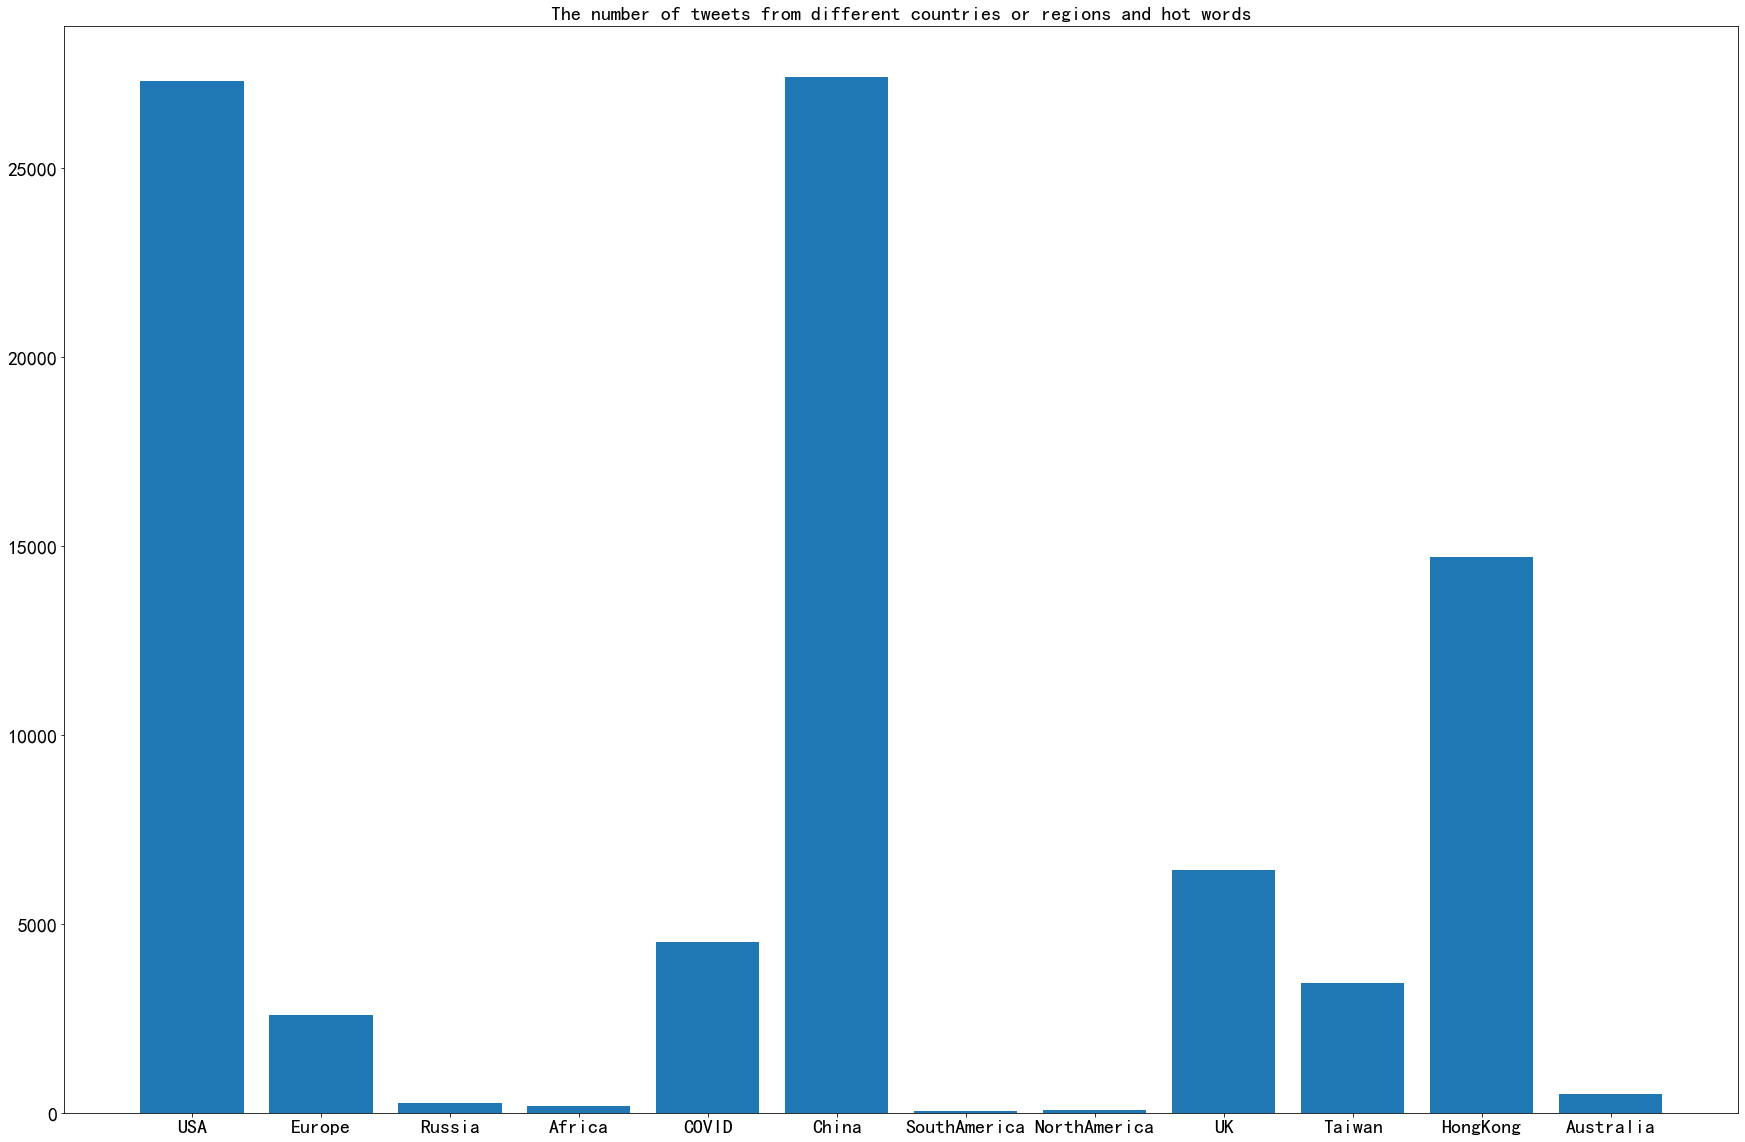

In [123]:
plt.figure(figsize = (30,20))
name_list = ['USA','Europe','Russia','Africa','COVID','China','SouthAmerica','NorthAmerica','UK','Taiwan','HongKong','Australia']
plt.bar(range(len(chinese_offensive_list)), chinese_offensive_list, tick_label = name_list)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('The number of tweets from different countries or regions and hot words',fontsize=20)
plt.savefig('chinese_offensive_list.png')
plt.show()

In [101]:
#Read the English tweet CSV file
tweet_english_negative = pd.read_csv('tweet_english_negative.csv')
tweet_english_negative.head()

,tweet_id,text,word,text_tag,tweet,user_location,sentiment
0,1215055917747585024,indeed remarkable like remarkable example offi...,"['indeed', 'remarkable', 'like', 'remarkable',...","[('indeed', 'RB'), ('remarkable', 'JJ'), ('lik...","This is indeed remarkable, just like it's a re...",United States,-1.0
1,1215055918045548544,msnbc truly pathetic fake news medium outlet h...,"['msnbc', 'truly', 'pathetic', 'fake', 'news',...","[('msnbc', 'NN'), ('truly', 'RB'), ('pathetic'...",RT @Jamierodr14: WOW! \n\nMSNBC is truly Pathe...,United States,-2.0
2,1215055921254227969,shot dark fizzle iran propaganda statement roc...,"['shot', 'dark', 'fizzle', 'iran', 'propaganda...","[('shot', 'NN'), ('dark', 'NN'), ('fizzle', 'N...",RT @thro_e: 😬 WHEN SHOTS IN THE DARK FIZZLE 😬\...,"Nashua, NH",-2.0
3,1215055917227495424,fact checking trump address iran attack trump ...,"['fact', 'checking', 'trump', 'address', 'iran...","[('fact', 'NN'), ('checking', 'VBG'), ('trump'...",Fact-checking Trump’s address on the Iran atta...,NaN,-3.0
4,1215055915520491520,iran claim killed american pentagon said zero ...,"['iran', 'claim', 'killed', 'american', 'penta...","[('iran', 'NN'), ('claim', 'NN'), ('killed', '...","RT @sxdoc: Iran claims it killed 30 Americans,...",UK,-2.0


In [137]:
english_negative_list = []

In [138]:
china = ['china','chinese']
pattern = '|'.join(china)
tweet_china = tweet_english_negative[tweet_english_negative.text.str.contains(pattern, case=False)]
english_negative_list.append(len(tweet_china))
tweet_china.head()

,tweet_id,text,word,text_tag,tweet,user_location,sentiment
137,1215055223724609536,maybe trump made back channel deal like noko n...,"['maybe', 'trump', 'made', 'back', 'channel', ...","[('maybe', 'RB'), ('trump', 'NN'), ('made', 'V...",@BarbMcQuade Maybe Trump made a back channel d...,Deep Loving Meditation,-1.0
191,1215054890134695936,since pronunciation chinese difficult inaccura...,"['since', 'pronunciation', 'chinese', 'difficu...","[('since', 'IN'), ('pronunciation', 'NN'), ('c...",RT @297965473Kam: Since the pronunciation of C...,NaN,-2.0
199,1215054867556917250,china forcing religious organization spread co...,"['china', 'forcing', 'religious', 'organizatio...","[('china', 'NN'), ('forcing', 'VBG'), ('religi...",RT @chuckwoolery: China is Forcing Religious O...,NaN,-1.0
230,1215054641148260352,chinese regime sending dozen dance troupe spre...,"['chinese', 'regime', 'sending', 'dozen', 'dan...","[('chinese', 'JJ'), ('regime', 'NN'), ('sendin...",RT @JanJekielek: @ShenYun The Chinese regime h...,Kea'au Hawaii,-4.0
250,1215054525863731202,since pronunciation chinese difficult inaccura...,"['since', 'pronunciation', 'chinese', 'difficu...","[('since', 'IN'), ('pronunciation', 'NN'), ('c...",Since the pronunciation of Chinese is difficul...,NaN,-1.0


In [139]:
england = ['england','united kingdom','britain']
pattern = '|'.join(england)
tweet_england = tweet_english_negative[tweet_english_negative.text.str.contains(pattern, case=False)]
english_negative_list.append(len(tweet_england))
tweet_england.head()

,tweet_id,text,word,text_tag,tweet,user_location,sentiment
69,1215055596455632897,svetlana lokhova another victim deep state gre...,"['svetlana', 'lokhova', 'another', 'victim', '...","[('svetlana', 'NN'), ('lokhova', 'VBZ'), ('ano...","RT @RampTheresa: Svetlana Lokhova, another vic...","NappyCity, USA",-3.0
139,1215055210076348424,liberal britain strong flexible forward outwar...,"['liberal', 'britain', 'strong', 'flexible', '...","[('liberal', 'JJ'), ('britain', 'NN'), ('stron...","RT @SimonBruni: Liberal Britain is strong, fle...","London, UK",-1.0
160,1215055075128872960,svetlana lokhova another victim deep state gre...,"['svetlana', 'lokhova', 'another', 'victim', '...","[('svetlana', 'NN'), ('lokhova', 'VBZ'), ('ano...","RT @RampTheresa: Svetlana Lokhova, another vic...",Europe / USA / World / Gab.ai,-3.0
237,1215054614195834881,svetlana lokhova another victim deep state gre...,"['svetlana', 'lokhova', 'another', 'victim', '...","[('svetlana', 'NN'), ('lokhova', 'VBZ'), ('ano...","RT @RampTheresa: Svetlana Lokhova, another vic...",Nederland,-2.0
257,1215054423161962498,svetlana lokhova another victim deep state gre...,"['svetlana', 'lokhova', 'another', 'victim', '...","[('svetlana', 'NN'), ('lokhova', 'VBZ'), ('ano...","RT @RampTheresa: Svetlana Lokhova, another vic...",NaN,-1.0


In [140]:
russia = ['russia','russian']
pattern = '|'.join(russia)
tweet_russia = tweet_english_negative[tweet_english_negative.text.str.contains(pattern, case=False)]
english_negative_list.append(len(tweet_russia))
tweet_russia.head()

,tweet_id,text,word,text_tag,tweet,user_location,sentiment
0,1215055917747585024,indeed remarkable like remarkable example offi...,"['indeed', 'remarkable', 'like', 'remarkable',...","[('indeed', 'RB'), ('remarkable', 'JJ'), ('lik...","This is indeed remarkable, just like it's a re...",United States,-1.0
23,1215055780589731841,demean debase election process cooperating rus...,"['demean', 'debase', 'election', 'process', 'c...","[('demean', 'JJ'), ('debase', 'NN'), ('electio...",demean and debase the election process by coop...,NaN,-3.0
92,1215055444345081858,hippie blueeyes pete ofurniture lie military a...,"['hippie', 'blueeyes', 'pete', 'ofurniture', '...","[('hippie', 'JJ'), ('blueeyes', 'NNS'), ('pete...",@tpkatsa1 @billwithrights @hrt6017 @downrangec...,NaN,-2.0
129,1215055270759616512,seeing russian disinformation micro target ser...,"['seeing', 'russian', 'disinformation', 'micro...","[('seeing', 'VBG'), ('russian', 'JJ'), ('disin...",RT @mikercarpenter: I've been seeing how Russi...,🌎,-2.0
138,1215055211082977280,hope christmas break made forget russian inter...,"['hope', 'christmas', 'break', 'made', 'forget...","[('hope', 'NN'), ('christmas', 'NN'), ('break'...",RT @PeterStefanovi2: This is what @BorisJohns...,"London, UK",-2.0


In [141]:
us = ['america','united states','north america']
pattern = '|'.join(us)
tweet_us = tweet_english_negative[tweet_english_negative.text.str.contains(pattern, case=False)]
english_negative_list.append(len(tweet_us))
tweet_us.head()

,tweet_id,text,word,text_tag,tweet,user_location,sentiment
4,1215055915520491520,iran claim killed american pentagon said zero ...,"['iran', 'claim', 'killed', 'american', 'penta...","[('iran', 'NN'), ('claim', 'NN'), ('killed', '...","RT @sxdoc: Iran claims it killed 30 Americans,...",UK,-2.0
24,1215055777641259008,msnbc pushed iranian propaganda tonight report...,"['msnbc', 'pushed', 'iranian', 'propaganda', '...","[('msnbc', 'NN'), ('pushed', 'VBD'), ('iranian...",MSNBC pushed Iranian propaganda tonight by rep...,"Cardiff, Wales",-1.0
28,1215055758007635973,truly fake news medium america american portra...,"['truly', 'fake', 'news', 'medium', 'america',...","[('truly', 'RB'), ('fake', 'JJ'), ('news', 'NN...",Truly is Sad how our Fake News Media in Ameri...,NaN,-2.0
29,1215055748906078209,barr interference special counsel investigatio...,"['barr', 'interference', 'special', 'counsel',...","[('barr', 'NN'), ('interference', 'NN'), ('spe...",@RiegerReport @SenMikeLee now do @TheJusticeDe...,"Detroit, MI",-2.0
32,1215055742480322568,democrat medium jump spread propaganda false c...,"['democrat', 'medium', 'jump', 'spread', 'prop...","[('democrat', 'NN'), ('medium', 'NN'), ('jump'...",Democrat Media jumps to spread War Propaganda ...,Left Coast USA,-2.0


In [142]:
coronavirus = ['coronavirus','covid-19','covid','new coronavirus','corona virus']
pattern = '|'.join(coronavirus)
tweet_coronavirus = tweet_english_negative[tweet_english_negative.text.str.contains(pattern, case=False)]
english_negative_list.append(len(tweet_coronavirus))
tweet_coronavirus.head()

,tweet_id,text,word,text_tag,tweet,user_location,sentiment
174569,1217073516475895813,sars conspiracy theory began emerge russian sc...,"['sars', 'conspiracy', 'theory', 'began', 'eme...","[('sars', 'NNS'), ('conspiracy', 'VBP'), ('the...",SARS conspiracy theory \nbegan to emerge when ...,\nAsia Pacific,-1.0
182284,1235354219693182977,part stop spread misinformation coronavirus im...,"['part', 'stop', 'spread', 'misinformation', '...","[('part', 'NN'), ('stop', 'VB'), ('spread', 'N...",RT @DailySignal: Do your part to stop the spre...,NaN,-1.0
182285,1235354209081409537,break racist propaganda xenophobic corona viru...,"['break', 'racist', 'propaganda', 'xenophobic'...","[('break', 'JJ'), ('racist', 'NN'), ('propagan...",RT @ludakristinnn: to break it down 4 y’all- r...,NaN,-3.0
182291,1235354006853234689,fake news coronavirus sant,"['fake', 'news', 'coronavirus', 'sant']","[('fake', 'JJ'), ('news', 'NN'), ('coronavirus...",RT @Limportant_fr: Top 10 des «fake news» sur ...,"Châlons-en-Champagne, France",-1.0
182294,1235353991371993088,corona virus known year therefore sicko realea...,"['corona', 'virus', 'known', 'year', 'therefor...","[('corona', 'JJ'), ('virus', 'NN'), ('known', ...",@realDonaldTrump Corona virus was known years ...,"Colorado, USA",-1.0


In [143]:
southamerica = ['mexico', 'south america']
pattern = '|'.join(southamerica)
tweet_southamerica = tweet_english_negative[tweet_english_negative.text.str.contains(pattern, case=False)]
english_negative_list.append(len(tweet_southamerica))
tweet_southamerica.head()

,tweet_id,text,word,text_tag,tweet,user_location,sentiment
1232,1215047773604732928,damage fake news promise mexico paying wall,"['damage', 'fake', 'news', 'promise', 'mexico'...","[('damage', 'NN'), ('fake', 'JJ'), ('news', 'N...",@Dude11087861 @AlexandraChalup @realDonaldTrum...,NaN,-2.0
2324,1215040593837068290,spain communist deputy prime minister presente...,"['spain', 'communist', 'deputy', 'prime', 'min...","[('spain', 'JJ'), ('communist', 'JJ'), ('deput...",Spain’s New Communist Deputy Prime Minister On...,Fort Dix NJ area,-1.0
5559,1215016817086926851,make either fault dems crooked hillary deep st...,"['make', 'either', 'fault', 'dems', 'crooked',...","[('make', 'VB'), ('either', 'DT'), ('fault', '...",@ScottTuke @johngable5 @MikeBates Make a list....,"Ohio, USA",-1.0
5676,1215015988946784261,love much middle east interferes backyard much...,"['love', 'much', 'middle', 'east', 'interferes...","[('love', 'RB'), ('much', 'JJ'), ('middle', 'N...","@jorgemuycurioso @TrumpSuxAtGolfn Oh yes, I lo...","Atlanta, GA",-2.0
14264,1214944936304373760,inaccurate like guess canada mexico suspect tr...,"['inaccurate', 'like', 'guess', 'canada', 'mex...","[('inaccurate', 'NN'), ('like', 'IN'), ('guess...",@DanAmira @jessesingal This is so inaccurate (...,"Central Kootenay, British Columbia",-1.0


In [144]:
middle_east = ['middle east','iran']
pattern = '|'.join(middle_east)
tweet_middle_east = tweet_english_negative[tweet_english_negative.text.str.contains(pattern, case=False)]
english_negative_list.append(len(tweet_middle_east))
tweet_middle_east.head()

,tweet_id,text,word,text_tag,tweet,user_location,sentiment
1,1215055918045548544,msnbc truly pathetic fake news medium outlet h...,"['msnbc', 'truly', 'pathetic', 'fake', 'news',...","[('msnbc', 'NN'), ('truly', 'RB'), ('pathetic'...",RT @Jamierodr14: WOW! \n\nMSNBC is truly Pathe...,United States,-2.0
2,1215055921254227969,shot dark fizzle iran propaganda statement roc...,"['shot', 'dark', 'fizzle', 'iran', 'propaganda...","[('shot', 'NN'), ('dark', 'NN'), ('fizzle', 'N...",RT @thro_e: 😬 WHEN SHOTS IN THE DARK FIZZLE 😬\...,"Nashua, NH",-2.0
3,1215055917227495424,fact checking trump address iran attack trump ...,"['fact', 'checking', 'trump', 'address', 'iran...","[('fact', 'NN'), ('checking', 'VBG'), ('trump'...",Fact-checking Trump’s address on the Iran atta...,NaN,-3.0
4,1215055915520491520,iran claim killed american pentagon said zero ...,"['iran', 'claim', 'killed', 'american', 'penta...","[('iran', 'NN'), ('claim', 'NN'), ('killed', '...","RT @sxdoc: Iran claims it killed 30 Americans,...",UK,-2.0
5,1215055905630257153,still allowing iranian propaganda show timelin...,"['still', 'allowing', 'iranian', 'propaganda',...","[('still', 'RB'), ('allowing', 'VBG'), ('irani...",@SteveRustad1 You still allowing the Iranian p...,Earth,-1.0


In [145]:
eu = ['europe','eu countries','european union']
pattern = '|'.join(eu)
tweet_middle_eu = tweet_english_negative[tweet_english_negative.text.str.contains(pattern, case=False)]
english_negative_list.append(len(tweet_middle_eu))
tweet_middle_eu.head()

,tweet_id,text,word,text_tag,tweet,user_location,sentiment
115,1215055343488831490,objective news channel tabloid version news wa...,"['objective', 'news', 'channel', 'tabloid', 'v...","[('objective', 'JJ'), ('news', 'NN'), ('channe...",@americagirl15 @TreyYingst @JenniferJJacobs Th...,"Nenagh, Co Tipperary, Eire",-1.0
134,1215055237100265474,much easy cover propaganda democratic value ev...,"['much', 'easy', 'cover', 'propaganda', 'democ...","[('much', 'JJ'), ('easy', 'JJ'), ('cover', 'NN...",@RaniaKhalek It was much more easy to cover wi...,NaN,-2.0
344,1215053884022034432,interested populism bustikova extreme reaction...,"['interested', 'populism', 'bustikova', 'extre...","[('interested', 'JJ'), ('populism', 'NN'), ('b...",RT @RRResRobot: Are you interested in populism...,https://keybase.io/benborges,-3.0
349,1215053830305583105,first rule getting public behind dehumanised e...,"['first', 'rule', 'getting', 'public', 'behind...","[('first', 'RB'), ('rule', 'NN'), ('getting', ...",@vharrelle71 @edwardpoole1975 The first rule o...,NaN,-1.0
450,1215053094502969344,seems inaccurate many time compared european c...,"['seems', 'inaccurate', 'many', 'time', 'compa...","[('seems', 'VBZ'), ('inaccurate', 'JJ'), ('man...",@weatherdan GFS seems inaccurate many times co...,NaN,-1.0


In [146]:
taiwan = ['taiwan']
pattern = '|'.join(taiwan)
tweet_taiwan = tweet_english_negative[tweet_english_negative.text.str.contains(pattern, case=False)]
english_negative_list.append(len(tweet_taiwan))
tweet_taiwan.head()

,tweet_id,text,word,text_tag,tweet,user_location,sentiment
35,1215055740655849472,flew taiwan cover interference taiwan presiden...,"['flew', 'taiwan', 'cover', 'interference', 't...","[('flew', 'JJ'), ('taiwan', 'NN'), ('cover', '...",RT @ChinaUncensored: So we flew all the way to...,NaN,-1.0
113,1215055348110782465,flew taiwan cover interference taiwan presiden...,"['flew', 'taiwan', 'cover', 'interference', 't...","[('flew', 'JJ'), ('taiwan', 'NN'), ('cover', '...",RT @ChinaUncensored: So we flew all the way to...,Everywhere,-1.0
214,1215054735750791168,flew taiwan cover interference taiwan presiden...,"['flew', 'taiwan', 'cover', 'interference', 't...","[('flew', 'JJ'), ('taiwan', 'NN'), ('cover', '...",RT @ChinaUncensored: So we flew all the way to...,Nowhere,-2.0
353,1215053817550499840,flew taiwan cover interference taiwan presiden...,"['flew', 'taiwan', 'cover', 'interference', 't...","[('flew', 'JJ'), ('taiwan', 'NN'), ('cover', '...",RT @ChinaUncensored: So we flew all the way to...,"Melbourne, Victoria",-3.0
429,1215053250224803840,beijing aggression influence disinformation ta...,"['beijing', 'aggression', 'influence', 'disinf...","[('beijing', 'VBG'), ('aggression', 'NN'), ('i...","RT @CDT: Beijing's Aggression, Influence, and ...","Berkeley, CA",-1.0


In [147]:
hongkong = ['hong kong']
pattern = '|'.join(hongkong)
tweet_hongkong = tweet_english_negative[tweet_english_negative.text.str.contains(pattern, case=False)]
english_negative_list.append(len(tweet_hongkong))
tweet_hongkong.head()

,tweet_id,text,word,text_tag,tweet,user_location,sentiment
256,1215054434218070016,hong kong govn fake news hongkongprotests hong...,"['hong', 'kong', 'govn', 'fake', 'news', 'hong...","[('hong', 'RB'), ('kong', 'JJ'), ('govn', 'NNS...",https://t.co/KJ3wVjj64F\n\nHong Kong Govn Fake...,Hong Kong,-1.0
1225,1215047821457444864,tired phone mortgage company looking sell some...,"['tired', 'phone', 'mortgage', 'company', 'loo...","[('tired', 'VBN'), ('phone', 'NN'), ('mortgage...",Im so tired of this phone bs. If it's not my m...,"Nevada, USA",-1.0
1343,1215046964825346049,order rule world china relied system relies ki...,"['order', 'rule', 'world', 'china', 'relied', ...","[('order', 'NN'), ('rule', 'NN'), ('world', 'N...",@RiegerReport @washingtonpost In order to rule...,NaN,-1.0
1749,1215044301987536896,flew taiwan cover interference taiwan presiden...,"['flew', 'taiwan', 'cover', 'interference', 't...","[('flew', 'JJ'), ('taiwan', 'NN'), ('cover', '...",So we flew all the way to Taiwan to cover CCP ...,New York,-1.0
1905,1215043155080278016,flew taiwan cover interference taiwan presiden...,"['flew', 'taiwan', 'cover', 'interference', 't...","[('flew', 'JJ'), ('taiwan', 'NN'), ('cover', '...",So we flew all the way to Taiwan to cover CCP ...,New York,-1.0


In [148]:
Africa = ['africa']
pattern = '|'.join(Africa)
tweet_Africa = tweet_english_negative[tweet_english_negative.text.str.contains(pattern, case=False)]
english_negative_list.append(len(tweet_Africa))
tweet_Africa.head()

,tweet_id,text,word,text_tag,tweet,user_location,sentiment
996,1215049412902293509,fake news alert trump tweet asked ramaphosa co...,"['fake', 'news', 'alert', 'trump', 'tweet', 'a...","[('fake', 'JJ'), ('news', 'NN'), ('alert', 'NN...",RT @News24: Fake news alert: Trump did not twe...,"Ethekwini, South Africa",-4.0
1545,1215045592692482048,dear african american assistant coach stop goi...,"['dear', 'african', 'american', 'assistant', '...","[('dear', 'JJ'), ('african', 'JJ'), ('american...","Dear African American NFL assistant coaches,\n...","Houston, TX",-1.0
2283,1215040786502434816,either part trump manipulation propaganda amer...,"['either', 'part', 'trump', 'manipulation', 'p...","[('either', 'DT'), ('part', 'NN'), ('trump', '...",@RKJones16 @AlwaysThink12 @eugenegu @realDonal...,"Stoughton, MA",-3.0
2966,1215035949282996230,fake news alert trump tweet asked ramaphosa co...,"['fake', 'news', 'alert', 'trump', 'tweet', 'a...","[('fake', 'JJ'), ('news', 'NN'), ('alert', 'NN...",RT @News24: Fake news alert: Trump did not twe...,Durban,-3.0
3336,1215033008261980160,fake news alert trump tweet asked ramaphosa co...,"['fake', 'news', 'alert', 'trump', 'tweet', 'a...","[('fake', 'JJ'), ('news', 'NN'), ('alert', 'NN...",Fake news alert: Trump did not tweet that he a...,"Bexhill, England",-1.0


In [149]:
Australia = ['australia']
pattern = '|'.join(Australia)
tweet_Australia = tweet_english_negative[tweet_english_negative.text.str.contains(pattern, case=False)]
english_negative_list.append(len(tweet_Australia))
tweet_Australia.head()

,tweet_id,text,word,text_tag,tweet,user_location,sentiment
1002,1215049374381871106,australia literally fire right iran inaccurate...,"['australia', 'literally', 'fire', 'right', 'i...","[('australia', 'NNS'), ('literally', 'RB'), ('...",We have Australia LITERALLY ON FIRE RIGHT NOW....,"Detroit, MI",-1.0
1368,1215046756838170624,arrested arson australian fire stop propaganda...,"['arrested', 'arson', 'australian', 'fire', 's...","[('arrested', 'VBN'), ('arson', 'NN'), ('austr...",@SenSchumer MORE THAN 200 PPL ARRESTED FOR ARS...,NaN,-2.0
2416,1215040092483379202,friend please stop sharing news iran australia...,"['friend', 'please', 'stop', 'sharing', 'news'...","[('friend', 'NN'), ('please', 'NN'), ('stop', ...","Friends please stop sharing news about Iran, U...","Batangas, Philippines",-3.0
3015,1215035591902941184,thomas wynn auspol american billionaire fake n...,"['thomas', 'wynn', 'auspol', 'american', 'bill...","[('thomas', 'NN'), ('wynn', 'NN'), ('auspol', ...",RT @Sir_Thomas_Wynn: #auspol \n\nAMERICAN BILL...,Australia,-1.0
4892,1215021255482576897,please read trustworthy newspaper journalistic...,"['please', 'read', 'trustworthy', 'newspaper',...","[('please', 'NN'), ('read', 'VB'), ('trustwort...",RT @jryerson1: Please read a trustworthy newsp...,NaN,-3.0


In [150]:
english_negative_list

[185825,
 4041,
 128783,
 142295,
 293949,
 818,
 108915,
 8309,
 7355,
 2078,
 2125,
 1138]

In [1]:
plt.figure(figsize = (60,20))
english_name_list = ['China','UK','Russia','USA&NorthAmerica','COVID','SouthAmerica&Mexico',
                     'MiddleEast&Iran','EU','Taiwan','HongKong','Africa','Australia']
plt.bar(range(len(english_negative_list)), english_negative_list, tick_label = english_name_list)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('The number of tweets from different countries or regions and hot words',fontsize=20)
plt.savefig('english_offensive_list.png')
plt.show()

NameError: name 'plt' is not defined